In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [69]:
df = pd.read_csv("London_houses.csv")
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


In [70]:
df.tail(10)

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
13539,2019-04-01,england,245077,E92000001,59710.0,NaN,0
13540,2019-05-01,england,245255,E92000001,65387.0,NaN,0
13541,2019-06-01,england,246140,E92000001,66723.0,NaN,0
13542,2019-07-01,england,248562,E92000001,70681.0,NaN,0
13543,2019-08-01,england,249432,E92000001,75079.0,NaN,0
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,0
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,0
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0
13548,2020-01-01,england,247355,E92000001,NaN,NaN,0


In [71]:
## Let's drop the final row cause it's the only data that we have on 2020
df = df[df.date != "2020-01-01" ]
df.tail()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
13543,2019-08-01,england,249432,E92000001,75079.0,NaN,0
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,0
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,0
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0


In [72]:
df.shape

(13504, 7)

In [73]:
## The analysis is for the London area but the dataset includes data from more areas, let's drop these areas.
# Viewing the available areas in the dataset that aren't london boroughs
df[df['borough_flag'] == 0]['area'].unique()

array(['south east', 'inner london', 'outer london', 'north east',
       'north west', 'yorks and the humber', 'east midlands',
       'west midlands', 'east of england', 'london', 'south west',
       'england'], dtype=object)

In [74]:
## Verify the rest areas
df[df['borough_flag'] == 1]['area'].unique()

array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'tower hamlets', 'greenwich', 'hackney', 'hammersmith and fulham',
       'haringey', 'harrow', 'havering', 'hillingdon', 'hounslow',
       'islington', 'kensington and chelsea', 'kingston upon thames',
       'lambeth', 'lewisham', 'merton', 'newham', 'redbridge',
       'richmond upon thames', 'southwark', 'sutton', 'waltham forest',
       'wandsworth', 'westminster'], dtype=object)

In [75]:
df = df[df['borough_flag'] == 1]
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


In [76]:
## Checking for nan values
df.isnull().any()

date             False
area             False
average_price    False
code             False
houses_sold       True
no_of_crimes      True
borough_flag     False
dtype: bool

In [77]:
## Count the number of the null
print(df["houses_sold"].isnull().sum())
print(df["no_of_crimes"].isnull().sum())

36
2496


In [78]:
## Examine some basic statistics numbers
df.describe()

,average_price,houses_sold,no_of_crimes,borough_flag
count,9.903000e+03,9867.000000,7407.000000,9903.0
mean,2.959291e+05,317.304145,2157.462400,1.0
std,1.987951e+05,145.175810,901.889645,0.0
min,5.046000e+04,2.000000,0.000000,1.0
25%,1.633930e+05,217.000000,1622.000000,1.0
50%,2.516000e+05,300.000000,2131.000000,1.0
75%,3.794005e+05,404.500000,2580.500000,1.0
max,1.463378e+06,1073.000000,7461.000000,1.0


In [79]:
## Creating some new columns that can help the analysis
df["Year"] = df["date"].apply(lambda x: x.split("-")[0])
df["Month"] = df["date"].apply(lambda x: x.split("-")[1])
df["Post_code"] = df["code"].str[1:]
df.drop(columns=["date","code"], inplace=True)


In [80]:
## Convert the variable type
df["Year"] = df.Year.astype(str).astype(int)
df["Month"] = df.Month.astype(str).astype(int)
df["Post_code"] = df["Post_code"].astype(str).astype(int)
df.dtypes

area              object
average_price      int64
houses_sold      float64
no_of_crimes     float64
borough_flag       int64
Year               int32
Month              int32
Post_code          int32
dtype: object

In [81]:
df.columns

Index(['area', 'average_price', 'houses_sold', 'no_of_crimes', 'borough_flag',
       'Year', 'Month', 'Post_code'],
      dtype='object')

C:\Users\nikos\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


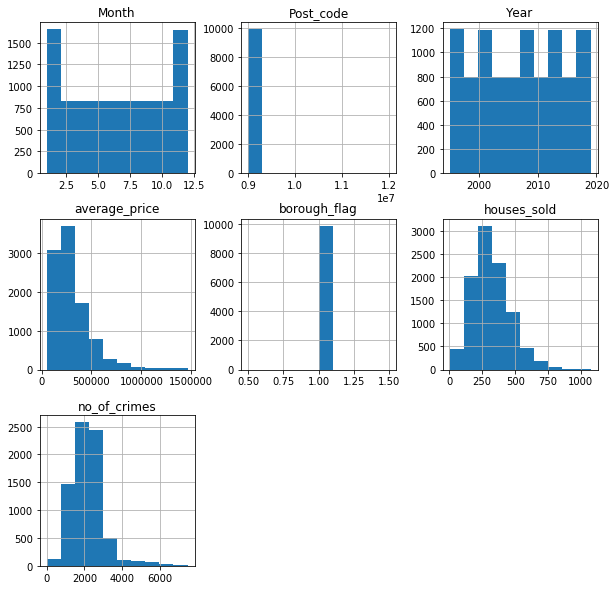

In [82]:
## Visualize basic charts and examine the distribution of the features 

fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

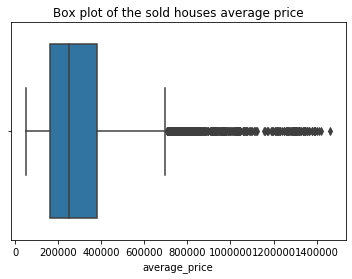

In [83]:
# Create a boxplot of the houses average price
sn.boxplot(df["average_price"]).set_title("Box plot of the sold houses average price")
plt.show()

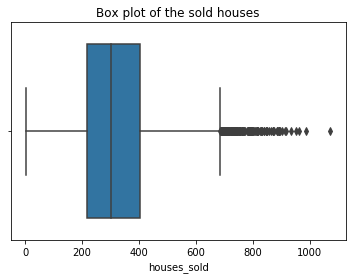

In [84]:
# A boxplot of the sold houses
sn.boxplot(df["houses_sold"]).set_title("Box plot of the sold houses")
plt.show()

In [85]:
##Let's examine the distribution of the sold houses over the years 
sold_house = df.groupby("Year").sum()

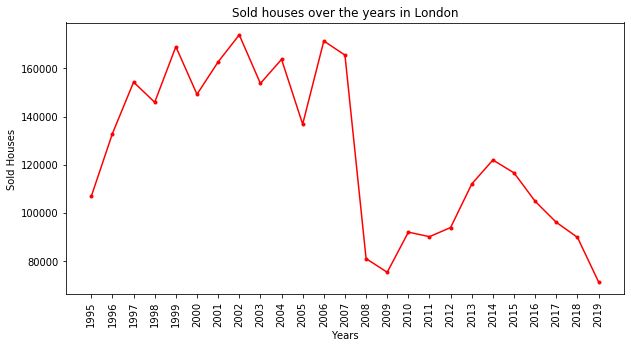

In [110]:
x = [i for i, df in df.groupby("Year")]

plt.figure(figsize=(10,5))

plt.title("Sold houses over the years in London")

plt.plot(x,sold_house["houses_sold"], "r.-")
plt.xlabel('Years')

plt.ylabel('Sold Houses')
plt.xticks(x, rotation="90")
plt.show()

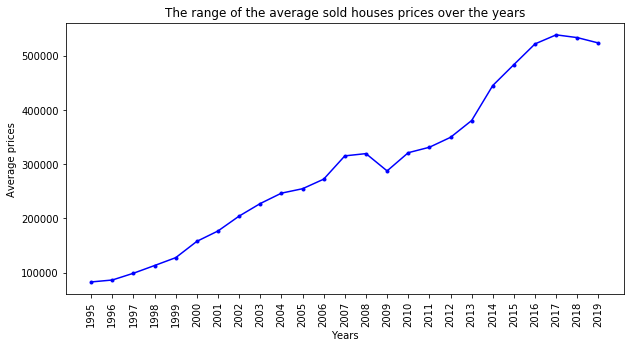

In [87]:
## The distribution of the average prices and the total gross sales revenue over the years
average_price = df.groupby("Year").mean()
gross_sales = df.groupby("Year").sum()

plt.figure(figsize=(10,5))

plt.title("The range of the average sold houses prices over the years")


plt.plot(x,average_price["average_price"], "b.-")


plt.xlabel('Years')
plt.ylabel('Average prices')

plt.xticks(x, rotation="90")
plt.show()

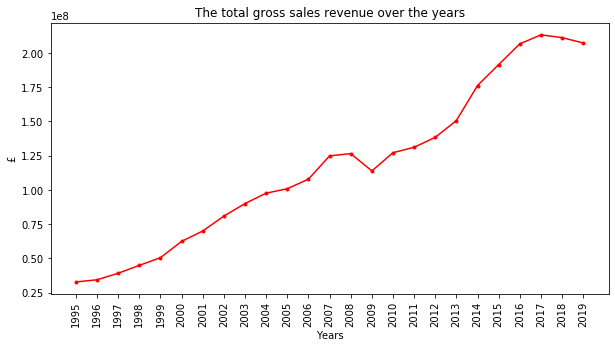

In [88]:
## The gross sales revenue over the years
plt.figure(figsize=(10,5))

plt.title("The total gross sales revenue over the years")

plt.plot(x,gross_sales["average_price"], "r.-")


plt.xlabel('Years')
plt.ylabel('£')

plt.xticks(x, rotation="90")
plt.show()

In [89]:
## Which was the month with the most sold houses?
month = df.groupby("Month").sum()
month

,average_price,houses_sold,no_of_crimes,borough_flag,Year,Post_code
Month,,,,,,
1,236685882,215697.0,1322926.0,825,1655775.0,7.425014e+09
2,237531909,211788.0,1226783.0,827,1659767.0,7.443014e+09
3,237998414,261035.0,1361817.0,825,1655775.0,7.425014e+09
4,239375918,236298.0,1305147.0,826,1657773.0,7.437014e+09
5,241186501,256149.0,1378838.0,825,1655775.0,7.425014e+09
6,243601181,280371.0,1357823.0,825,1655775.0,7.425014e+09
7,246329268,304224.0,1395828.0,825,1655775.0,7.425014e+09
8,248483236,297589.0,1325033.0,825,1655775.0,7.425014e+09
9,250149872,274911.0,1303392.0,825,1655775.0,7.425014e+09


In [90]:
mon = [i for i, df in  df.groupby("Month")]

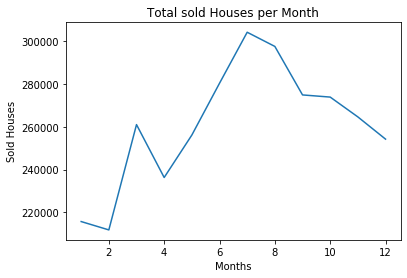

In [91]:
# Finding the month with the most sold houses

plt.plot(mon, month["houses_sold"])
plt.title("Total sold Houses per Month")

plt.xlabel("Months")
plt.ylabel("Sold Houses")
plt.show()

In [92]:
mean_price = df.groupby("Month").mean()
mean_price

,average_price,houses_sold,no_of_crimes,borough_flag,Year,Post_code
Month,,,,,,
1,286891.978182,261.450909,2140.656958,1.0,2007.000000,9.000017e+06
2,287221.171705,256.712727,1985.085761,1.0,2006.973398,9.000017e+06
3,288482.926061,316.406061,2203.587379,1.0,2007.000000,9.000017e+06
4,289801.353511,286.421818,2115.311183,1.0,2006.989104,9.003649e+06
5,292347.273939,310.483636,2234.745543,1.0,2007.000000,9.000017e+06
6,295274.158788,339.843636,2200.685575,1.0,2007.000000,9.000017e+06
7,298580.930909,368.756364,2262.282010,1.0,2007.000000,9.000017e+06
8,301191.801212,360.713939,2147.541329,1.0,2007.000000,9.000017e+06
9,303211.966061,333.225455,2112.466775,1.0,2007.000000,9.000017e+06


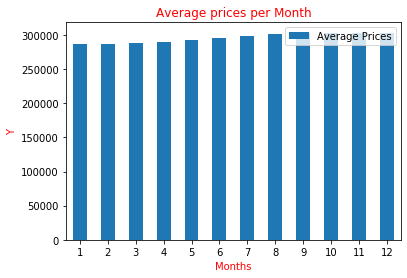

In [93]:
# The total sold houses per month and the mean price which they sold
df2 = pd.DataFrame({'Average Prices': mean_price["average_price"]}, index=mon)
ax = df2.plot.bar(rot=0)

plt.title("Average prices per Month", color="r")

plt.ylabel("Y", color="r")
plt.xlabel("Months", color="r")

plt.show()

In [94]:
## Examine the data by area
area = df.groupby("area").mean()
area.head()

,average_price,houses_sold,no_of_crimes,borough_flag,Year,Month,Post_code
area,,,,,,,
barking and dagenham,159382.250000,198.989967,1598.921053,1.0,2007.0,6.5,9000002.0
barnet,304272.120000,446.983278,2276.938596,1.0,2007.0,6.5,9000003.0
bexley,189097.030000,325.588629,1298.070175,1.0,2007.0,6.5,9000004.0
brent,269830.480000,272.953177,2415.188596,1.0,2007.0,6.5,9000005.0
bromley,253551.966667,496.709030,2019.614035,1.0,2007.0,6.5,9000006.0


In [95]:
district = [i for i, df in df.groupby("area")]
UpCases  = [elem.upper() for elem in district]

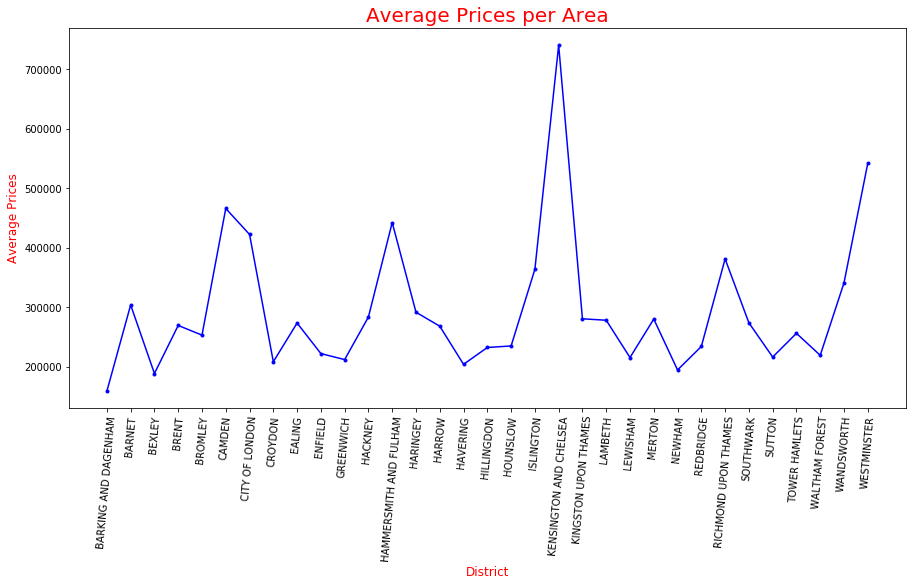

In [96]:

plt.figure(figsize=(15,7))

plt.plot(UpCases, area["average_price"], "b.-")
plt.title("Average Prices per Area", color="r", size=20)


plt.xlabel("District", color="r", size=12)
plt.ylabel("Average Prices", color="r", size=12)

plt.xticks(UpCases, rotation="85", size=10)


plt.show()

In [103]:
price = area.average_price
lnd_top10_pr = price.sort_values(ascending = False).to_frame()
font_sizelnd_top10_pr.head()

,average_price
area,
kensington and chelsea,740606.683333
westminster,542282.063333
camden,466358.253333
hammersmith and fulham,442773.376667
city of london,422771.363333


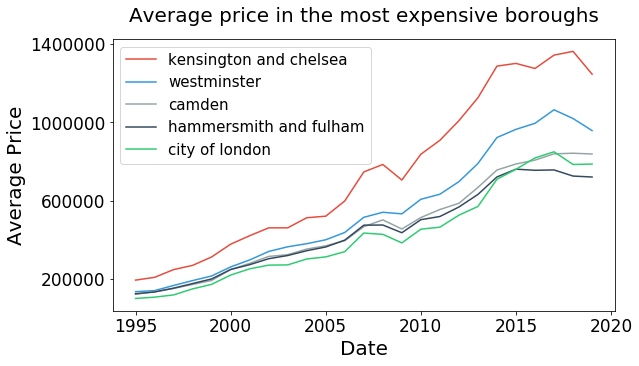

In [109]:
font_size=20
top5_indeces = lnd_top10_pr.head().index
colors = ['#e74c3c', '#3498db', '#95a5a6', '#34495e', '#2ecc71']

plt.figure(figsize = (9, 5))

for index, i in enumerate(top5_indeces):
    df_ = df[df['area'] == i]
    df_ = df_.groupby('Year')['average_price'].mean()
    
    df_.plot(y = 'average_price', label = i, color = colors[index])
       
plt.title('Average price in the most expensive boroughs', y = 1.04, size = font_size)
plt.xlabel('Date', size = font_size)
plt.xticks(size = font_size - 3)
plt.ylabel('Average Price', size = font_size)
plt.yticks([0.2*1E+6, 0.6*1E+6, 1.0*1E+6, 1.4*1E+6], size = font_size - 3)
plt.legend(fontsize = font_size - 5);

In [54]:
## Lets examine how the crisis afected every area in London 
pd.set_option('display.max_rows', None)

df_pivot = pd.pivot_table(df,index=["area","Year"],values=["houses_sold", "average_price"])
df_pivot

average_price  houses_sold
area                   Year                            
barking and dagenham   1995   5.181800e+04   123.000000
                       1996   5.171825e+04   156.750000
                       1997   5.597425e+04   202.833333
                       1998   6.028575e+04   208.000000
                       1999   6.532083e+04   223.833333
                       2000   7.754950e+04   234.416667
                       2001   8.866400e+04   266.916667
                       2002   1.122219e+05   287.416667
                       2003   1.424990e+05   301.250000
                       2004   1.581760e+05   301.333333
                       2005   1.633609e+05   240.833333
                       2006   1.678532e+05   304.500000
                       2007   1.849097e+05   332.083333
                       2008   1.873568e+05   140.666667
                       2009   1.564469e+05   105.166667
                       2010   1.665608e+05   121.083333
                       2011   1.634651e+05   121.500000
                       2012   1.658639e+05   111.833333
                       2013   1.737337e+05   149.000000
                       2014   2.011722e+05   188.250000
                       2015   2.334601e+05   200.416667
                       2016   2.739198e+05   183.583333
                       2017   2.877348e+05   172.500000
                       2018   2.951967e+05   161.083333
                       2019   2.990649e+05   130.818182
barnet                 1995   9.179250e+04   390.750000
                       1996   9.400042e+04   512.583333
                       1997   1.068832e+05   557.333333
                       1998   1.223592e+05   530.750000
                       1999   1.360044e+05   623.916667
                       2000   1.679527e+05   543.750000
                       2001   1.855633e+05   566.916667
                       2002   2.207462e+05   609.583333
                       2003   2.512128e+05   517.333333
                       2004   2.718541e+05   557.583333
                       2005   2.794597e+05   448.333333
                       2006   2.913378e+05   562.666667
                       2007   3.269154e+05   571.750000
                       2008   3.300233e+05   286.500000
                       2009   2.991030e+05   264.166667
                       2010   3.331281e+05   345.250000
                       2011   3.389780e+05   325.666667
                       2012   3.586274e+05   337.916667
                       2013   3.747706e+05   397.583333
                       2014   4.303633e+05   421.500000
                       2015   4.786881e+05   427.083333
                       2016   5.259395e+05   424.916667
                       2017   5.382809e+05   335.666667
                       2018   5.332664e+05   325.916667
                       2019   5.196950e+05   274.818182
bexley                 1995   6.429158e+04   284.333333
                       1996   6.549050e+04   329.583333
                       1997   7.078950e+04   392.166667
                       1998   8.063200e+04   356.083333
                       1999   8.677767e+04   421.666667
                       2000   1.031865e+05   364.083333
                       2001   1.165271e+05   439.166667
                       2002   1.367980e+05   478.166667
                       2003   1.644821e+05   432.833333
                       2004   1.791412e+05   422.166667
                       2005   1.865120e+05   337.916667
                       2006   1.918312e+05   416.500000
                       2007   2.080859e+05   417.000000
                       2008   2.101991e+05   207.250000
                       2009   1.890508e+05   181.083333
                       2010   2.008741e+05   205.833333
                       2011   2.006721e+05   212.083333
                       2012   2.025464e+05   239.500000
                       2013   2.134702e+05   281.500000
                       2014   2.444596e+05   328.6666

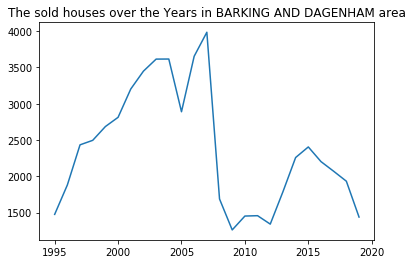

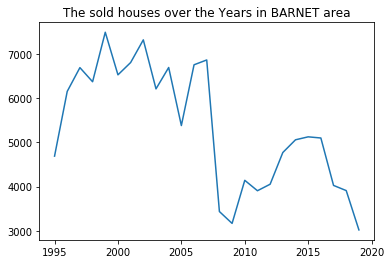

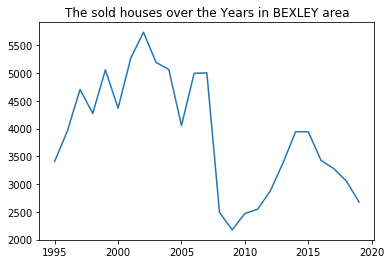

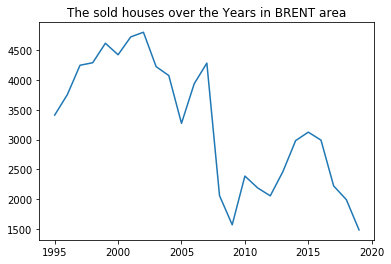

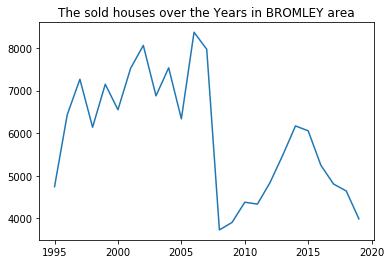

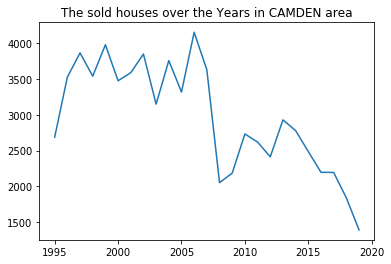

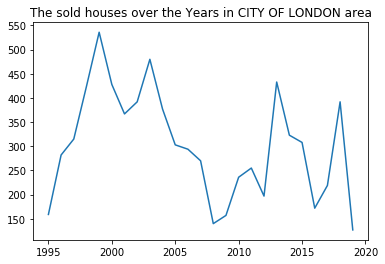

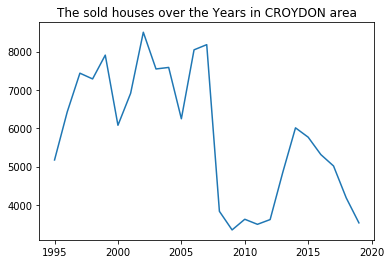

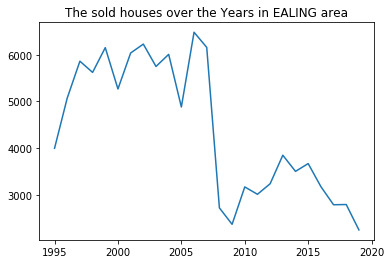

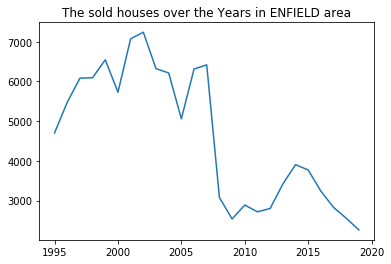

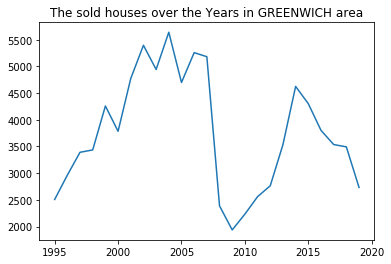

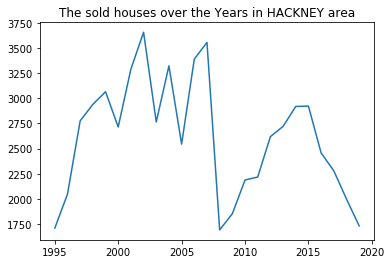

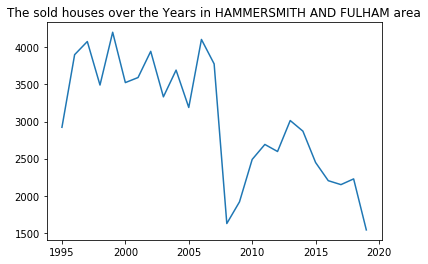

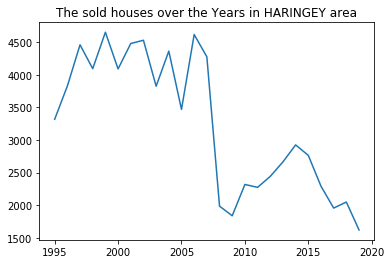

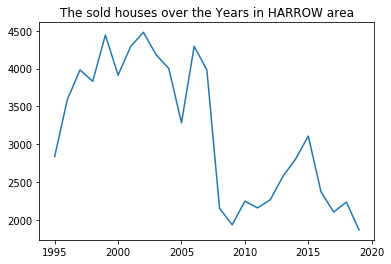

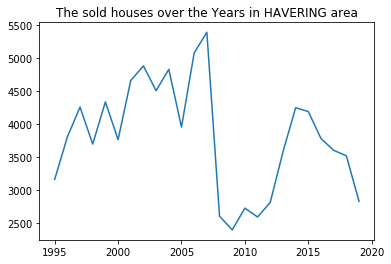

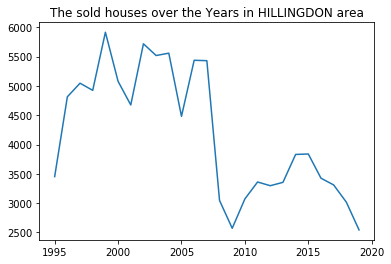

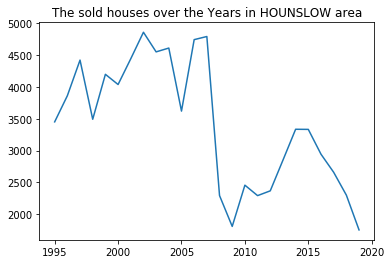

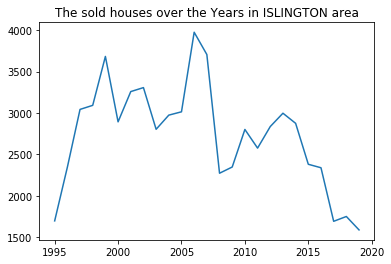

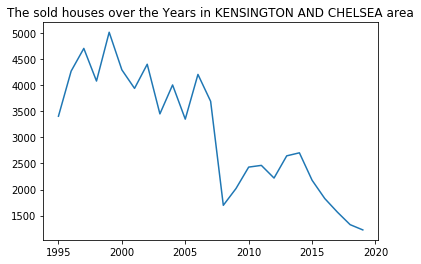

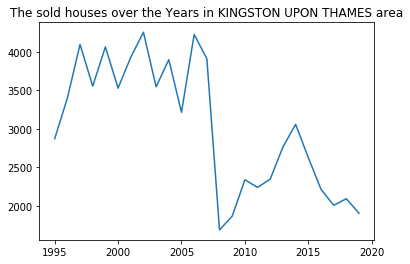

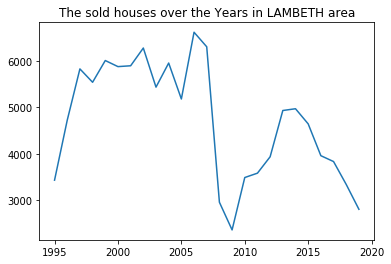

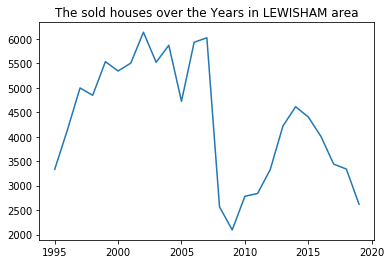

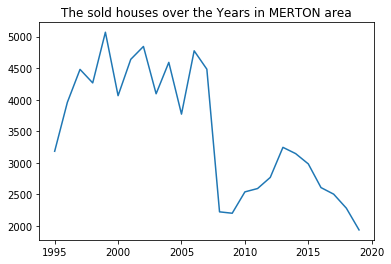

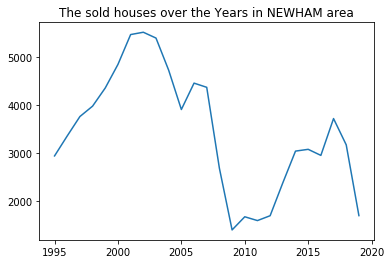

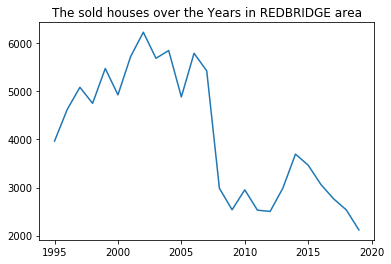

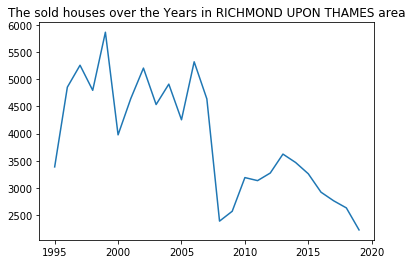

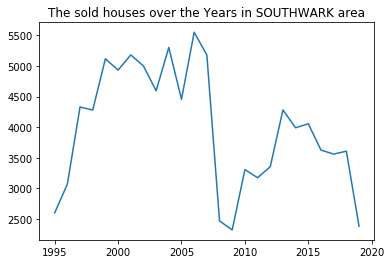

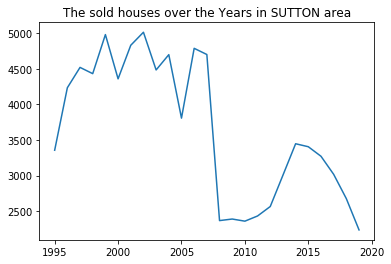

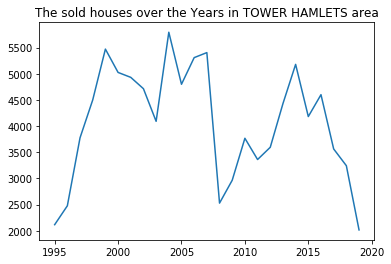

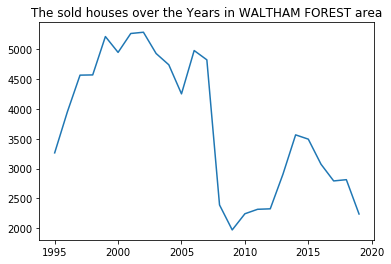

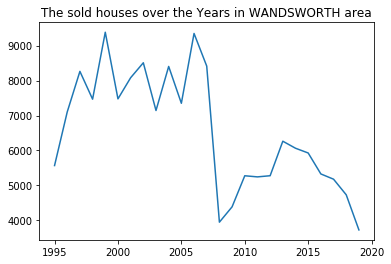

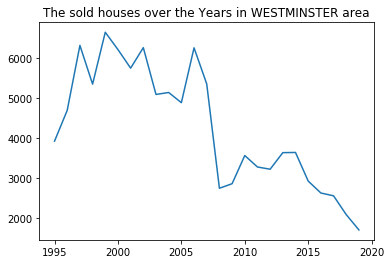

In [55]:
x = [i for i, df in df.groupby("area")]
for j in x:
    city = df[df["area"] == j].groupby("Year").sum()
    plt.title("The sold houses over the Years in "+ j.upper() + " area")
    c = [i for i, df in df[df["area"] == "city of london"].groupby("Year")]
    plt.plot(c, city["houses_sold"])
    plt.show()

In [56]:
df[500:600]

,area,average_price,houses_sold,no_of_crimes,borough_flag,Year,Month,Post_code
502,barking and dagenham,167493,141.0,1430.0000,1,2011,10,9000002
503,barking and dagenham,164847,124.0,1518.0000,1,2011,11,9000002
504,barking and dagenham,162631,111.0,1444.0000,1,2011,12,9000002
505,barking and dagenham,163899,81.0,1538.0000,1,2012,1,9000002
506,barking and dagenham,163607,122.0,1402.0000,1,2012,2,9000002
507,barking and dagenham,164438,162.0,1683.0000,1,2012,3,9000002
508,barking and dagenham,164731,68.0,1363.0000,1,2012,4,9000002
509,barking and dagenham,166503,101.0,1500.0000,1,2012,5,9000002
510,barking and dagenham,168049,127.0,1412.0000,1,2012,6,9000002
511,barking and dagenham,168007,134.0,1450.0000,1,2012,7,9000002


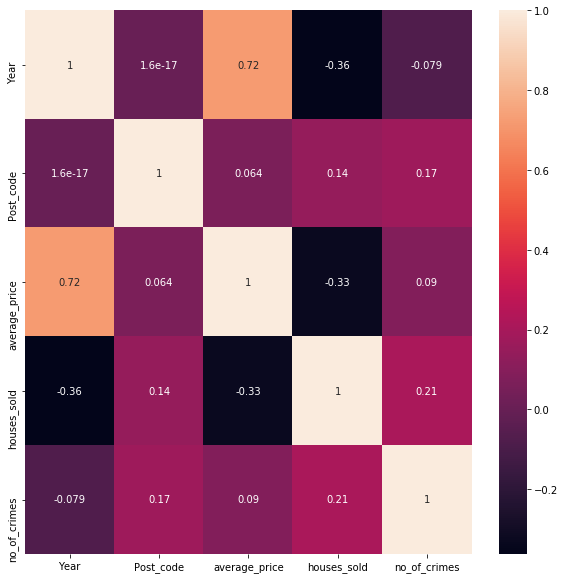

In [57]:
## At the end lets check the correlation of the features
# How the prices and the total sold houses affected by the number of the crimes, Year, post code

import seaborn as sn
df = df[["Year","Post_code","average_price", "houses_sold", "no_of_crimes"]]
plt.figure(figsize = (10,10))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

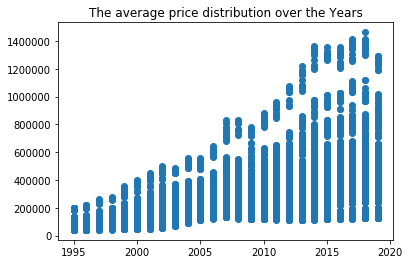

In [44]:
## The features Year and post code directly affect the sold houses and the prices
# Let's present a scatter plot of the average prices distribution over the years 
plt.title("The average price distribution over the Years")
plt.scatter(df["Year"], df["average_price"])
plt.show()